In [ ]:
import pandas as pd

image_list = pd.read_csv("data/raw_image_list.csv")
image_list.head()

In [ ]:
from pathlib import Path
import shutil

remote = (Path("/allen") / image_list.loc[1]["Isilon path"][1:] / image_list.loc[1]["File Name"]).resolve(strict=True)
print(f"Remote filepath: {remote}, Size in GB: {remote.stat().st_size / 1000 / 1000 / 1000}")

# local = Path(f"/tmp/{czi.name}")
# print(f"Beginning copy to: {local}")
# shutil.copy(str(czi), str(local))
# local.resolve(strict=True)
# print(f"Copy complete, located at: {local}")

In [ ]:
from timelapse_access.movies import generate_movie

generate_movie(remote, "/Users/jacksonb/Desktop/test.mp4", overwrite=True, series_range=slice(0, 100, 4), show_progress=True, C=0, fps=4)

In [1]:
from PIL import Image
from aicspylibczi import CziFile

czi = CziFile("timelapse_tools/tests/data/s_1_t_5_c_1_z_1.czi")
data, shape = czi.read_image(S=0, B=0, T=0)

timelapse_tools/tests/data/s_1_t_5_c_1_z_1.czi


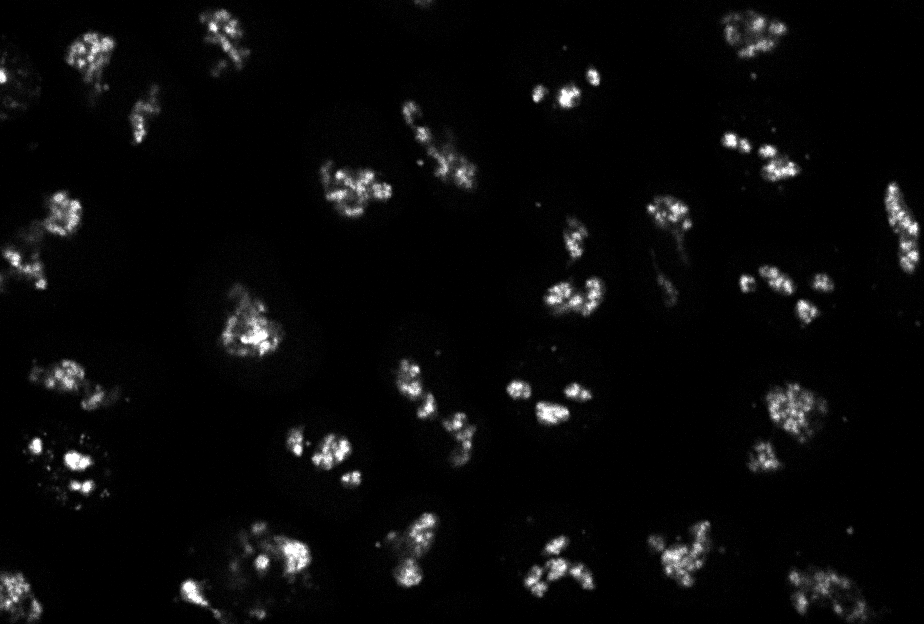

In [2]:
from timelapse_tools import normalization
import numpy as np

Image.fromarray(normalization.im2proj(
    data=data,
    shape=shape
).astype(np.uint8))

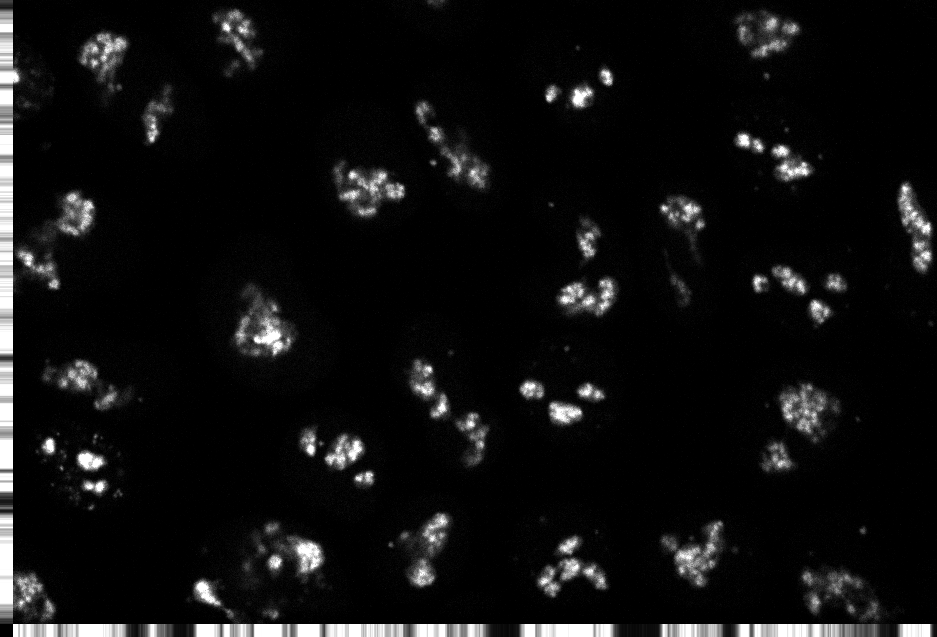

In [3]:
Image.fromarray(normalization.im2proj_all_axes(
    data=np.stack([data, data, data, data, data, data, data, data, data, data, data, data, data], axis=4)[0, ],
    shape=shape
).astype(np.uint8))